In [610]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
ACC={}

## L2 norm of a vector in Python

- L2 norm is defined as $||x||_2 = \sqrt{\sum_{i=1}^d x_i^2}$
- L1 norm is defined as $||x||_1 = \sum_{i=1}^d |x_i|$
- In Python, we use np.linalg.norm() to call L2 norm

In [611]:
x=[1,2,3]
print('L2 norm-squared',npl.norm(x)**2)
print('L2 norm',npl.norm(x,2))
print('L1 norm',npl.norm(x,1))

L2 norm-squared 14.0
L2 norm 3.7416573867739413
L1 norm 6.0


## Linear regression with synthetic dataset

### (a) Under-determined linear regression 

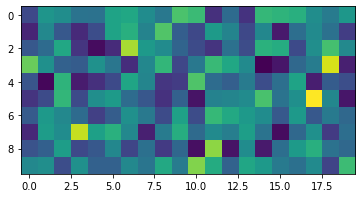

In [612]:
n=10  # Number of datapoints/equations
d=20  # Number of unknowns/parameters

X=np.random.randn(n,d)
y=np.random.randn(n)
plt.imshow(X)

#### Let us solve linear regression i.e. minimize least-squares loss $||y-X\beta||_2^2$
Solution: Pseudo-inverse $X^{\dagger} y=X^T(XX^T)^{-1}y$

In [613]:
Xpinv = np.linalg.pinv(X)
beta = Xpinv.dot(y)

# Check the least-squares loss: L2 norm of error
print('LS loss:', npl.norm(y-X.dot(beta)))

LS loss: 4.902926390826577e-15


### Over-determined linear regression

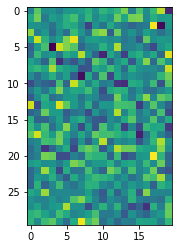

In [614]:
n=30  # Number of datapoints
d=20  # Number of unknowns

X=np.random.randn(n,d)
y=np.random.randn(n)
plt.imshow(X)

In [615]:
Xpinv = np.linalg.pinv(X)
beta = Xpinv.dot(y)
# Check the least-squares loss: L2 norm of error
print('LS loss:', npl.norm(y-X.dot(beta))**2,npl.norm(y)**2)

LS loss: 6.723748194399861 26.663617757872107


### How do we know above is optimal LS solution?
- Check the derivative (i.e. gradient) and make sure it is zero!

In [616]:
gradient = 2*X.T.dot(X.dot(beta)-y)
print('Size of the gradient:',npl.norm(gradient))

Size of the gradient: 8.918069880206753e-14


## MNIST digit recognition

### Load MNIST data

In [617]:
import torchvision
mnist_torch = torchvision.datasets.MNIST('./',download=True)
TOT=len(mnist_torch)

In [618]:
TOT

60000

In [619]:
ix=500
print('Label:',mnist_torch[ix][1])
mnist_torch[ix][0]

Label: 3


### Goal: Build a model that distinguishes [0,4] vs [5,9] 

In [620]:
mnist_labels = np.zeros(TOT)
for i in range(TOT):
    mnist_labels[i]=mnist_torch[i][1]>4
    if i<10:
        print(mnist_labels[i],mnist_torch[i][1])
mnist_labels

1.0 5
0.0 0
0.0 4
0.0 1
1.0 9
0.0 2
0.0 1
0.0 3
0.0 1
0.0 4


array([1., 0., 0., ..., 1., 1., 1.])

In [659]:
# Train: First N=15 examples out of 60k total
N=15
X_mnist=np.zeros((N,28,28))
y_mnist=np.zeros((N))
for i in range(N):
    X_mnist[i]=mnist_torch[i][0]
    y_mnist[i]=mnist_labels[i]

<Figure size 216x216 with 0 Axes>

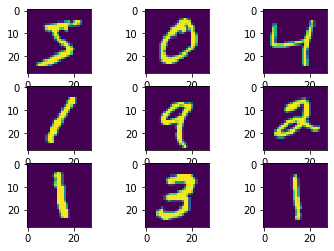

In [660]:
K=3
plt.figure(figsize=(K,K))
fig,ax=plt.subplots(K,K)
for i in range(K):
    for j in range(K):
        ax[i,j].imshow(X_mnist[K*i+j])

In [661]:
X_mnist.shape # N=15 << d=784

(15, 28, 28)

### Linear regression for MNIST
- Let us put inputs in the right format

In [662]:
X_mnist = X_mnist.reshape(N,28*28)

# Solve linear regression
beta = npl.pinv(X_mnist).dot(y_mnist)

In [663]:
# Verify least-squares loss is small
y_predict = X_mnist.dot(beta)
#print('Training loss:', npl.norm(y_mnist-y_predict)**2/N)

# Verify this model can predict digits!
# y_predict > 0.5 =>  assign to 1
# y_predict <= 0.5 => assign to 0
y_predict = y_predict>0.5

print('Training accuracy:',np.mean(y_predict==y_mnist))
print(y_predict==y_mnist)

Training accuracy: 1.0
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


#### We achieved 100% digit recognition accuracy with only 20 examples
- This is because we do the evaluation on the examples we trained with
- Proper evaluation should be done on examples never seen before!

In [664]:
# TEST: Last 10k examples out of 60k total
T=10000
X_test=np.zeros((T,28,28))
y_test=np.zeros((T))
for i in range(T):
    X_test[i]=mnist_torch[i+TOT-T][0]
    y_test[i]=mnist_labels[i+TOT-T]
X_test=X_test.reshape(T,28**2)

In [665]:
y_predict = X_test.dot(beta)>0.5
ACC[N]=np.mean(y_predict==y_test)
print(np.mean(y_predict==y_test))

0.5939


In [666]:
y_predict==y_test

array([ True, False,  True, ..., False, False, False])

### Plotting all test accuracies

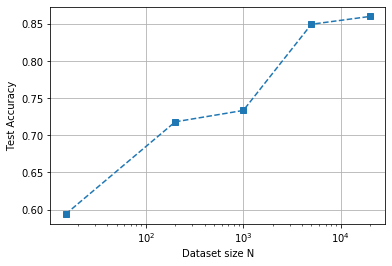

In [669]:
keys=list(ACC.keys())
vals=list(ACC.values())
vals=[vals[int(ix)] for ix in np.argsort(keys)]
keys=np.sort(keys)
plt.semilogx(keys,vals,'s--')
plt.ylabel('Test Accuracy')
plt.xlabel('Dataset size N')
plt.grid(True)

In [668]:
ACC.keys()

dict_keys([200, 1000, 5000, 20000, 15])